In [14]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [15]:
DATA_PATH = "genres_original"
GENRES = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
IMG_SIZE = (128, 128)

In [16]:
def extract_features(data_path, genres):
    features = []
    labels = []

    for genre in genres:
        genre_path = os.path.join(data_path, genre)
        for file in os.listdir(genre_path):
            if file.endswith(".wav"):
                file_path = os.path.join(genre_path, file)
                try:
                    audio, sr = librosa.load(file_path, duration=30)
                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
                    mfccs = np.mean(mfccs.T, axis=0) 
                    features.append(mfccs)
                    labels.append(genre)
                except Exception as e:
                    print(f"Error processing {file}: {e}")
    return np.array(features), np.array(labels)

In [17]:
features, labels = extract_features(DATA_PATH, GENRES)

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\1504984935.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, duration=30)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing jazz.00054.wav: 


In [18]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded, num_classes=len(GENRES))
X_train, X_test, y_train, y_test = train_test_split(features, labels_categorical, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', 
           input_shape=(40, 1), 
           kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(64, kernel_size=3, activation='relu', 
           kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax', kernel_regularizer=l2(0.01))
])
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 38, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 38, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 17, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 17, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,186 (289.79 KB)

 Trainable params: 73,738 (288.04 KB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, 
                    batch_size=32, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.1767 - loss: 5.5288 - val_accuracy: 0.1400 - val_loss: 5.4962 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3349 - loss: 4.6252 - val_accuracy: 0.2050 - val_loss: 4.6170 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3206 - loss: 4.3286 - val_accuracy: 0.2800 - val_loss: 4.1762 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4109 - loss: 3.9689 - val_accuracy: 0.3900 - val_loss: 3.7527 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4337 - loss: 3.7691 - val_accuracy: 0.4350 - val_loss: 3.5331 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4261 - loss: 3.6172 - val_accuracy: 0.5250 - val_loss: 3.3113 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4243 - loss: 3.4200 - 

In [21]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Testing Accuracy: 67.50%


In [22]:
import numpy as np
y_pred = model.predict(X_test)
count=0
for i in range(len(X_test)):
    true_label = np.argmax(y_test[i]) 
    predicted_label = np.argmax(y_pred[i])
    print(f"Sample {i + 1}: True Label = {true_label}, Predicted Label = {predicted_label}")
    if true_label == predicted_label:
        print("Prediction Correct!")
        count = count+1
    else:
        print("Prediction Incorrect!")
    print("-" * 50)
print(count)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Sample 1: True Label = 4, Predicted Label = 4
Prediction Correct!
--------------------------------------------------
Sample 2: True Label = 7, Predicted Label = 7
Prediction Correct!
--------------------------------------------------
Sample 3: True Label = 2, Predicted Label = 2
Prediction Correct!
--------------------------------------------------
Sample 4: True Label = 3, Predicted Label = 7
Prediction Incorrect!
--------------------------------------------------
Sample 5: True Label = 7, Predicted Label = 2
Prediction Incorrect!
--------------------------------------------------
Sample 6: True Label = 5, Predicted Label = 5
Prediction Correct!
--------------------------------------------------
Sample 7: True Label = 8, Predicted Label = 4
Prediction Incorrect!
--------------------------------------------------
Sample 8: True Label = 5, Predicted Label = 5
Prediction Correct!
--------------------------------------------------
Sample 9: True Label

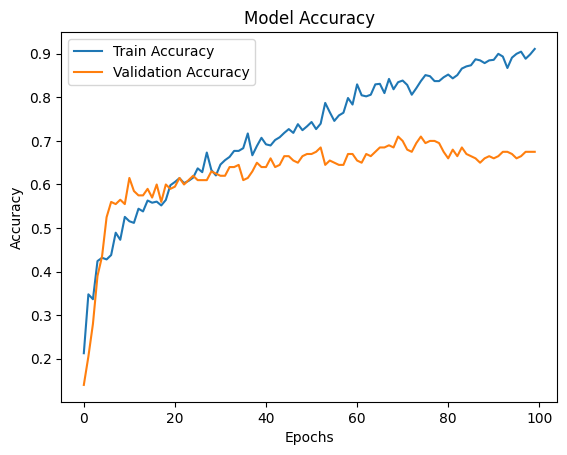

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

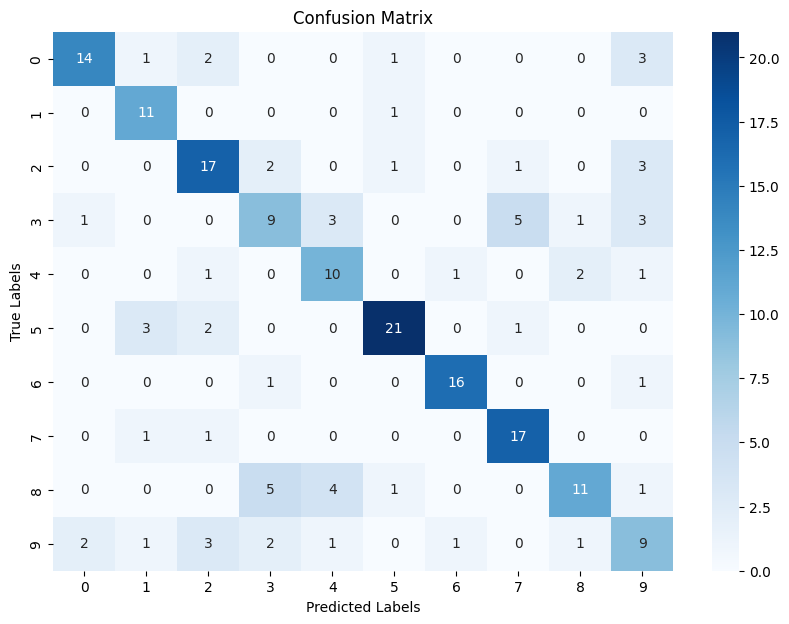

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_test_class_labels = np.argmax(y_test, axis=1)
y_test_pred_class_labels = np.argmax(y_test_pred, axis=1)
cm_test = confusion_matrix(y_test_class_labels, y_test_pred_class_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_class_labels), yticklabels=np.unique(y_test_class_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:
model.save('music_genre_model_audios.h5')